<a href="https://colab.research.google.com/github/nitinware/GoogleCloabNotebooks/blob/master/coursera/Intro_TF/Week4_CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-12-21 18:59:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   252MB/s    in 0.3s    

2020-12-21 18:59:58 (252 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.653.jpg', 'cat.343.jpg', 'cat.384.jpg', 'cat.815.jpg', 'cat.663.jpg', 'cat.793.jpg', 'cat.86.jpg', 'cat.883.jpg', 'cat.353.jpg', 'cat.461.jpg']
['dog.125.jpg', 'dog.926.jpg', 'dog.677.jpg', 'dog.693.jpg', 'dog.258.jpg', 'dog.630.jpg', 'dog.123.jpg', 'dog.113.jpg', 'dog.701.jpg', 'dog.363.jpg']


In [5]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

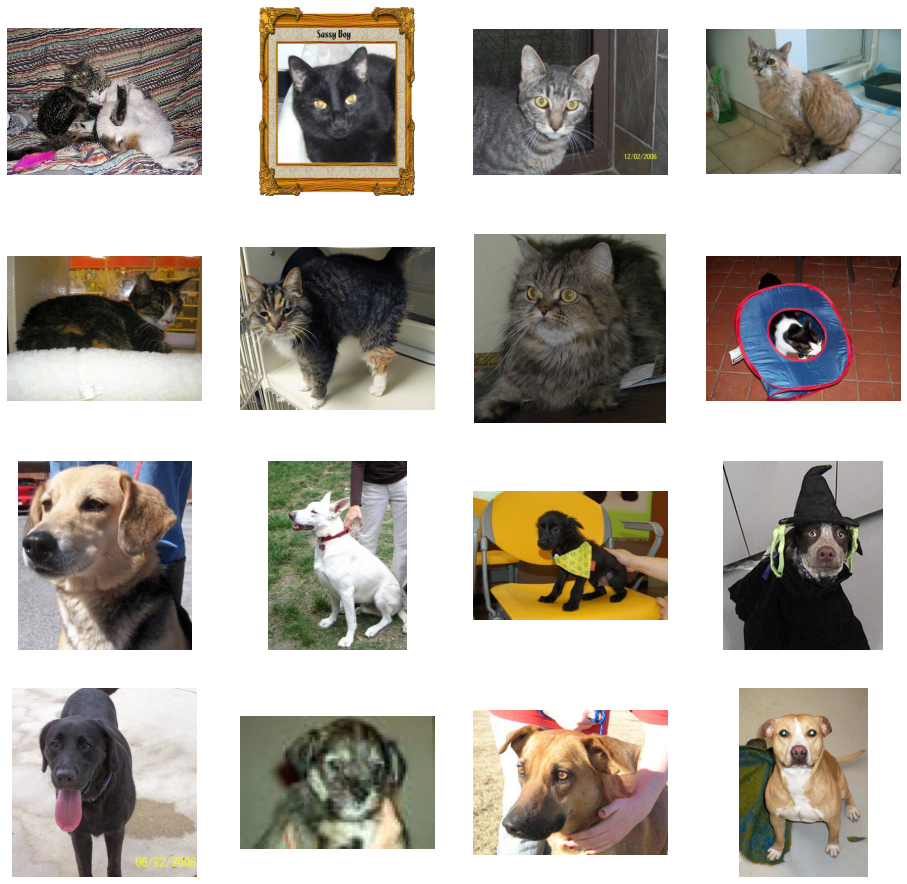

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [11]:
from tensorflow.keras.optimizers import RMSprop

In [12]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

In [15]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=20, 
                                                    class_mode='binary', 
                                                    target_size=(150,150))

Found 2000 images belonging to 2 classes.


In [16]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,150))

Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 15s - loss: 1.0009 - acc: 0.5330 - val_loss: 0.6582 - val_acc: 0.6320
Epoch 2/15
100/100 - 8s - loss: 0.6608 - acc: 0.6265 - val_loss: 0.6138 - val_acc: 0.6720
Epoch 3/15
100/100 - 8s - loss: 0.5961 - acc: 0.7000 - val_loss: 0.6460 - val_acc: 0.6230
Epoch 4/15
100/100 - 8s - loss: 0.5153 - acc: 0.7500 - val_loss: 0.6192 - val_acc: 0.6840
Epoch 5/15
100/100 - 8s - loss: 0.4218 - acc: 0.7920 - val_loss: 0.6500 - val_acc: 0.6750
Epoch 6/15
100/100 - 8s - loss: 0.3389 - acc: 0.8500 - val_loss: 0.6437 - val_acc: 0.7120
Epoch 7/15
100/100 - 8s - loss: 0.2522 - acc: 0.8965 - val_loss: 0.9371 - val_acc: 0.6940
Epoch 8/15
100/100 - 8s - loss: 0.1745 - acc: 0.9295 - val_loss: 1.0634 - val_acc: 0.6790
Epoch 9/15
100/100 - 8s - loss: 0.1195 - acc: 0.9580 - val_loss: 1.1328 - val_acc: 0.6920
Epoch 10/15
100/100 - 8s - loss: 0.0863 - acc: 0.9710 - val_loss: 2.2182 - val_acc: 0.6220
Epoch 11/15
100/100 - 8s - loss: 0.0511 - acc: 0.9825 - val_loss: 1.8860 - val_acc: 0.6780
Epoch 1

In [18]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Text(0.5, 1.0, 'Training and validation loss')

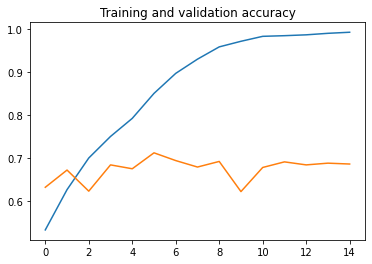

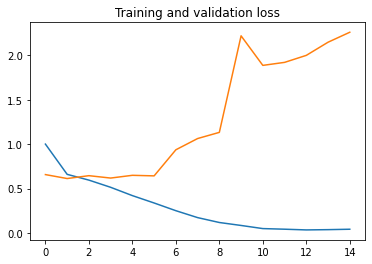

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )